In [1]:
import sys,time
sys.path.append('../')
from smodels.theory.theorySMS import TheorySMS
from smodels.experiment.expAuxiliaryFuncs import bracketToProcessStr
from smodels.theory.model import Model
from smodels.experiment.expSMS import ExpSMS
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.experiment.defaultFinalStates import finalStates

### Convert (old) bracket notation string to (new) process string

In [2]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl)
print(output)

(PV > anyBSM(1),anyBSM(3)),(anyBSM(1) > e-,nu,anyBSM(2)),(anyBSM(2) > jet,jet,MET),(anyBSM(3) > L,nu,MET)


In [3]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl,finalState=['MET','HSCP'],intermediateState=[['squark','gluino'],['squark']])
print(output)

(PV > squark(1),squark(3)),(squark(1) > e-,nu,gluino(2)),(gluino(2) > jet,jet,MET),(squark(3) > L,nu,HSCP)


In [4]:
stringEl = "[ [ ['jet','jet'] ], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl,finalState=['MET','HSCP'],intermediateState=[['gluino'],['anyBSM']])
print(output)

(PV > gluino(1),anyBSM(2)),(gluino(1) > jet,jet,MET),(anyBSM(2) > L,nu,HSCP)


### Convert process string to graph

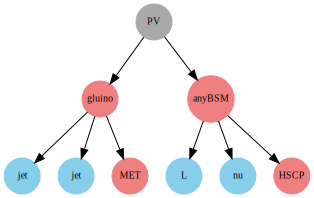

[PV, gluino, anyBSM, jet, jet, MET, L, nu, HSCP]
[(PV, gluino), (PV, anyBSM), (gluino, jet), (gluino, jet), (gluino, MET), (anyBSM, L), (anyBSM, nu), (anyBSM, HSCP)]


In [5]:
procString = output
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(output, model=finalStates)
tree = TheorySMS()
tree.add_nodes_from(expSMS.nodes)
tree.add_edges_from(expSMS.edgeIndices)

tree.draw()
print(tree.nodes)
print(tree.edges)

### Convert inclusive topology

In [6]:
stringEl = "[[['*']],[]]"
bracketToProcessStr(stringEl,finalState=['MET','MET'])

'(PV > anyBSM(1),MET),(anyBSM(1) > anySM,MET)'

In [7]:
stringEl = "[[['*','*']],[]]"
bracketToProcessStr(stringEl,finalState=['MET','MET'])

'(PV > anyBSM(1),MET),(anyBSM(1) > anySM,anySM,MET)'

In [8]:
stringEl = "[['*'],[]]"
bracketToProcessStr(stringEl,finalState=['MET','MET'])

'(PV > InclusiveNode(1),MET),(InclusiveNode(1) > anySM,MET)'

In [9]:
stringEl = "[[['e-','e+']],['*']]"
bracketToProcessStr(stringEl,finalState=['MET','HSCP'])

'(PV > anyBSM(1),InclusiveNode(2)),(anyBSM(1) > e-,e+,MET),(InclusiveNode(2) > anySM,HSCP)'